<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Final Project</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Exploratory Data Analysis</h3>
<p style="color: pink">The goals of the exploratory data analysis are:</p>
<ul style="color: pink">
    <li>to better understand the data,</li>
    <li>to evaluate if the given dataset is suitable for the K-Means clustering task.</li>
</ul>
<p style="color: pink">We need to:</p>
<ol style="color: pink">
    <li>Load the given Banknote authentication dataset.</li>
    <li>Calculate statistical measures, e.g. mean and standard deviation.</li>
    <li>Visualise the data as we consider fit.</li>
    <li>Evaluate if the given dataset is suitable for the K-Means clustering task.</li>
    <li>Write a short description of the dataset and our evaluation of its suitability for the K-Means clustering task.</li>
</ol>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
file_path = 'C:/Users/Jorge Payà/Desktop/4GeeksAcademy/DSML Bootcamp/KMeans-project/data/raw/Banknote-authentication-dataset.csv'
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


(None,
         V1      V2
 0  3.62160  8.6661
 1  4.54590  8.1674
 2  3.86600 -2.6383
 3  3.45660  9.5228
 4  0.32924 -4.4552)

<p style="color: pink">The dataset contains 1,372 entries with two continuous numerical attributes: V1 (variance of Wavelet Transformed image) and V2 (skewness of Wavelet Transformed image). There are no missing values, and both columns are of type float64. Next, I'll compute statistical measures such as the mean and standard deviation.</p>

In [5]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


<p style="color: pink">The statistical summary shows:
<ul style="color: pink">
    <li>V1 (variance): Mean = 0.43, Std = 2.84, Range = [-7.04, 6.82]</li>
    <li>V2 (skewness): Mean = 1.92, Std = 5.87, Range = [-13.77, 12.95]</li>
</ul>
<p style="color: pink">Both attributes have a wide range and significant variability, which suggests that clustering might be feasible. Now, I'll visualize the data to assess its distribution and potential clustering patterns.</p>

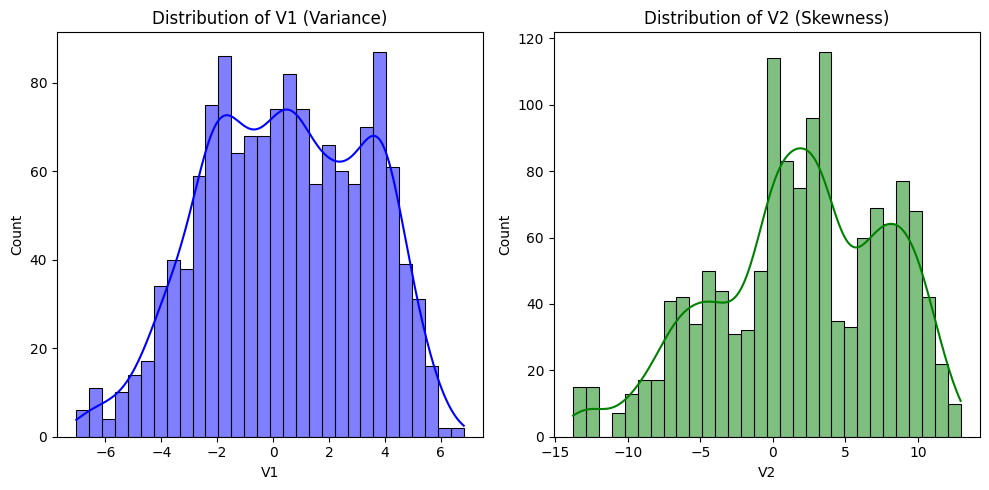

In [8]:
plt.figure(figsize=(10, 5))
# Histogram for V1
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.histplot(df['V1'], bins=30, color='blue', kde=True) # kde = kernel density estimation
plt.title('Distribution of V1 (Variance)')

# Histogram for V2
plt.subplot(1, 2, 2)
sns.histplot(df['V2'], bins=30, color='green', kde=True)
plt.title('Distribution of V2 (Skewness)')

plt.tight_layout()
plt.show()

<p style="color: pink">The histograms show that V1 (variance) has a roughly symmetric distribution, while V2 (skewness) is more spread out with noticeable peaks. Next, I'll create a scatter plot to examine if the data naturally forms cluster.</p>

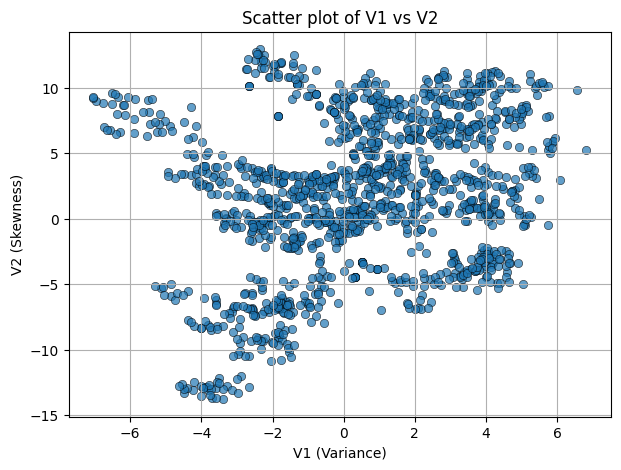

In [12]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['V1'], y=df['V2'], alpha=0.7, edgecolors='k')
plt.xlabel('V1 (Variance)')
plt.ylabel('V2 (Skewness)')
plt.title('Scatter plot of V1 vs V2')
plt.grid(True)
plt.show()

<p style="color: pink">
By plotting V1 vs. V2 we visualize and check if data points form distinct groups to identify potential cluster formations or overlapping areas. We use color coding (e.g., density shading or known labels if available) to enhance interpretability.
</p>

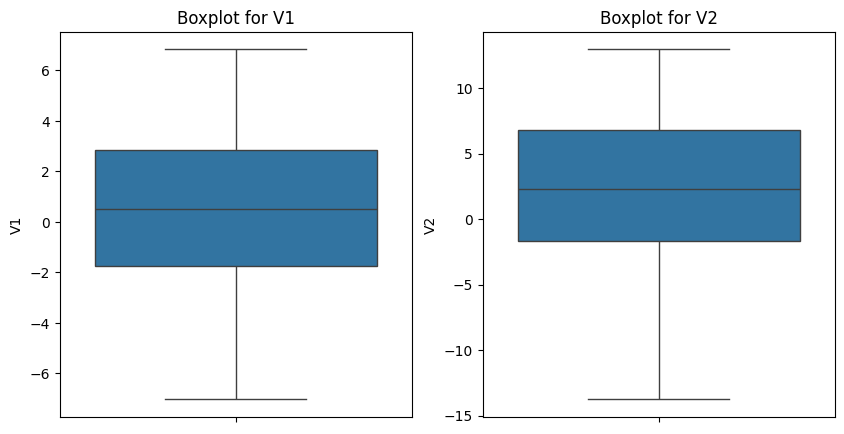

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['V1'])
plt.title('Boxplot for V1')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['V2'])
plt.title('Boxplot for V2')

plt.show()

In [16]:
# The boxplot shows that there are no outliers in the data, but let's confirm it using z-scores:
z_scores = np.abs(zscore(df[['V1', 'V2']]))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 0


<p style="color: pink"></p>